In [1]:
from deepforest import main, get_data, utilities
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
import rtree

from src.utils.plotting import plot_bboxes
from src.utils.IoU import find_false_positives

## Instantiate a model

In [4]:
model = main.deepforest()
model.use_release()

Reading config file: /usr/local/lib/python3.8/site-packages/deepforest/data/deepforest_config.yml
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


## Import labels and predict image

In [5]:
xml_path = get_data('OSBS_029.xml')
annotations = utilities.xml_to_annotations(xml_path)

In [6]:
# load the image file corresponding to the annotaion file
image_path = get_data('OSBS_029.png')
image = cv.imread(image_path)

In [7]:
predictions = model.predict_image(path=image_path)

/usr/local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
predictions.head()

,xmin,ymin,xmax,ymax,label,score
0,330.0,342.0,373.0,391.0,Tree,0.802979
1,216.0,206.0,248.0,242.0,Tree,0.778803
2,325.0,44.0,363.0,82.0,Tree,0.751573
3,261.0,238.0,296.0,276.0,Tree,0.748605
4,173.0,0.0,229.0,33.0,Tree,0.738210


## Plot Labels, Predictions, False Positives

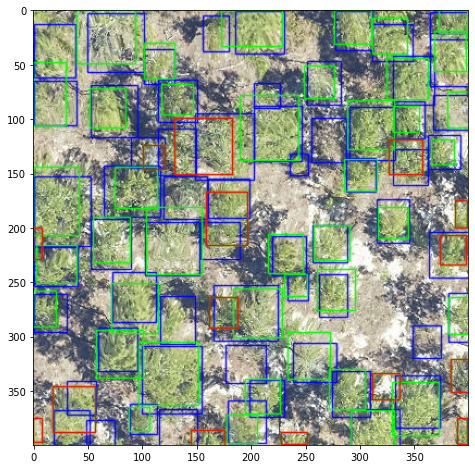

In [9]:
plt.figure(figsize=(8, 8))
img = image.copy()
# plot labels
plot_bboxes(img, annotations, color=(255, 0, 0))

# plot predictions
plot_bboxes(img, predictions, color=(0, 255, 0))

# plot false positives
fp_predictions_df = find_false_positives(predictions, annotations)
plot_bboxes(img, fp_predictions_df, color=(0, 0, 255))